In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [3]:
from scipy.optimize import curve_fit 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Carga del data set, se guarda en la variable df:

In [5]:
df=pd.read_csv("C:/Users/I_am_AlexX/Downloads/afluencia-preliminar-en-transporte-publico.xlsx-afluencia_diaria (3).csv")

Podemos ver la distribución de la cantidad de registros por tipo de transporte público con:

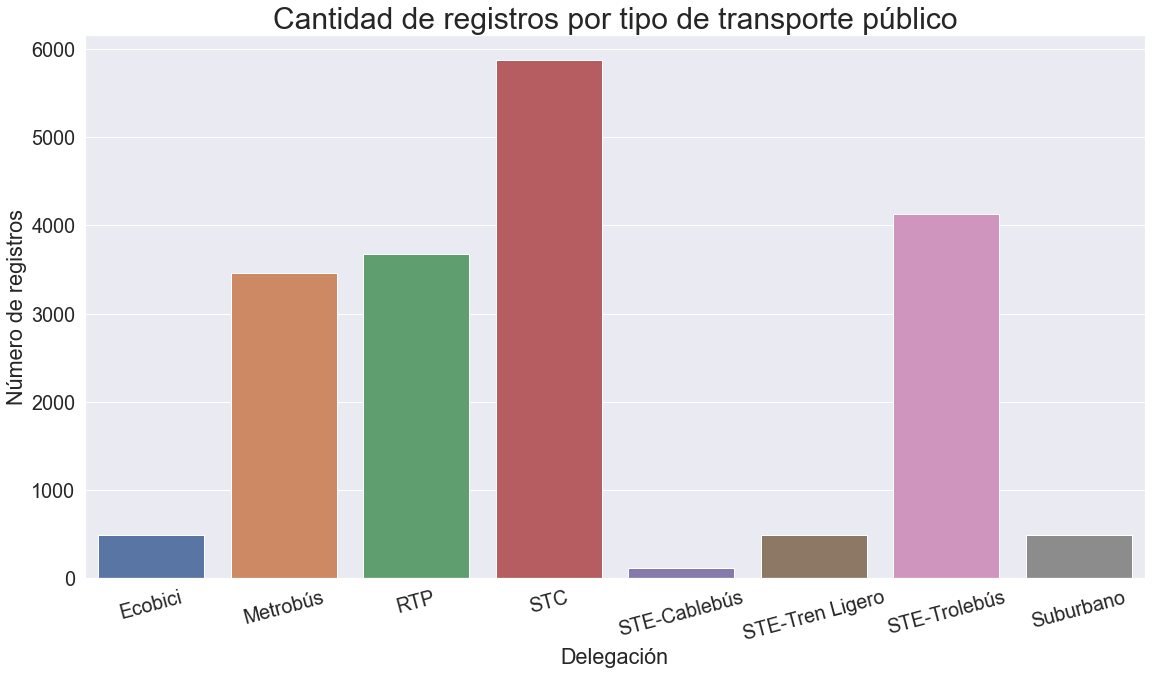

In [6]:
sns.set(font_scale = 1.8)
fig, ax = plt.subplots(figsize=(19, 10))
plt.xticks(rotation=15)
casos_por_del=sns.countplot(x='organismo',data=df)
casos_por_del.set(xlabel='Delegación', ylabel='Número de registros')
plt.title("Cantidad de registros por tipo de transporte público", size=30)
plt.savefig('Afluencia_cat_1_10.png',dpi=300)



# Filtro por tipo de organismo (Ecobici)

Analizaremos primero aquellos datos que tengan a ecobici dentro del campo de organismo

In [7]:
in_ecobici = df['organismo'] == "Ecobici"

Con el siguiente comando creamos un nuevo data set cuyos elementos solo contendrán aquellos cuya columna "organismo" sea igual a "ecobici"

In [8]:
afluencia_ecobici = df[in_ecobici]

In [9]:
afluencia_ecobici.shape

(489, 8)

Con lo anterior vemos que este subconjunto de datos tiene solo 489 registros de afluencia

In [10]:
afluencia_ecobici.head(1)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,"11,238"


Dibujemos ahora un scatter plot que nos muestra según el id que posean la afluencia total correpondiente a ese día(id)

<AxesSubplot:xlabel='id', ylabel='afluencia_total_preliminar'>

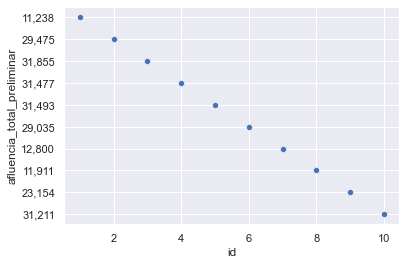

In [11]:
sns.set(font_scale = 1)
sns.scatterplot(data=afluencia_ecobici[0:10], x="id", y="afluencia_total_preliminar")

En la gráfica anterior observamos algo raro, se grafica una recta y los valores en el eje de las ordenadas no tienen un valor lógico pues no van en orden ascendente ni descendente, esto es porque los calores de la columna "afluencia_total_preliminar" no son números sino datos de tipo string como se puede corroborar con el siguiente comando.

In [12]:
type(afluencia_ecobici["afluencia_total_preliminar"][0]) # Solo nos hemos fijado en el primer elemento, pero todos 
#los demás tienen esta característica 

str

Así que debemos encontrar una forma para convertir esos datos de tipo "string" en datos de tipo "int" o "entero". Antes de hacer eso será conveniente ejecutar el siguiente comando:

In [13]:
afluencia_ecobici['afluencia_total_preliminar'] = afluencia_ecobici['afluencia_total_preliminar'].fillna("0,")

<ipython-input-13-fbfae2008eba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afluencia_ecobici['afluencia_total_preliminar'] = afluencia_ecobici['afluencia_total_preliminar'].fillna("0,")


Con lo anterior lo único que hemos hecho es sustituit los valores "NAN" (Not a number) por el string "0,". Esto será conveniento hacerlo de este modo como se explicará más adelante. Lo que haremos con el bucle siguiente es eliminar las "," dentro de los valores de la columna "afluencia_total_preliminar" ya que ese formato en el que se encuentra dificulta el transformarlo a un valor entero.

In [14]:
af_1=[]
for index, row in afluencia_ecobici.iterrows():
    row2=row['afluencia_total_preliminar'].replace(',', '')
    af_1.append(row2)

In [15]:
#af_1

In [16]:
# Quite el "#"  de la línea anterior y ejecutela para observar que ahora los números no tienen la coma ",".

Ahora simplemente transformamos todos esos valores a enteros con el siguiente bucle for:

In [17]:
afl_eco_int = [int(item) for item in af_1]


Finalmente solo queda comparar la columna 'afluencia_total_preliminar' y agregar los valores que hemos obtenido ya convertidos a enteros. Así podremos contrastar ambas columnas:

In [18]:
#afluencia_ecobici.drop(['afluencia_total_preliminar'], axis=1)

Y ahora agregamos la nueva lista al data set:

In [19]:
afluencia_ecobici= afluencia_ecobici.assign(afluencia_total_preliminar_1=afl_eco_int)


In [20]:
afluencia_ecobici.head(3)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,"11,238",11238
1,2,Ecobici,NaN,Lunes,2020-03-02,NaN,NaN,"29,475",29475
2,3,Ecobici,NaN,Martes,2020-03-03,NaN,NaN,"31,855",31855


Conversión de fecha a tipo date time:

In [21]:
afluencia_ecobici["fecha"]=pd.to_datetime(afluencia_ecobici["fecha"])

Ahora sí podemos intentar hacer nuevamente la gráfica tipo scatter y ver qué pasa:

Text(0.5, 1.0, 'Afluencia total de ecobici por día')

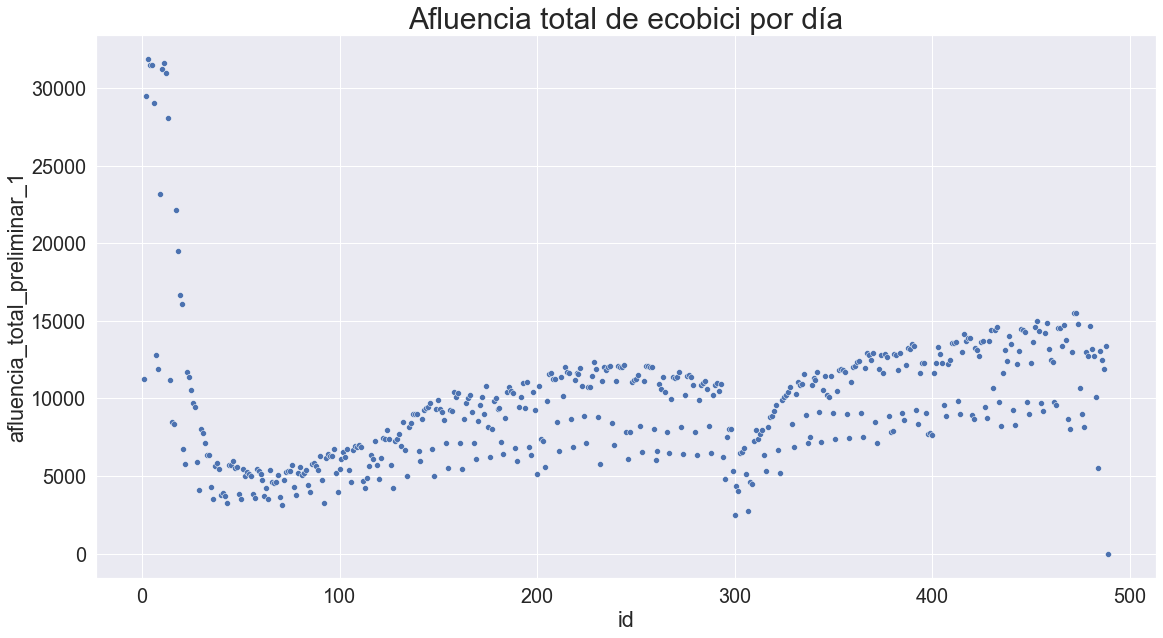

In [22]:
sns.set(font_scale = 1.8)
fig, ax = plt.subplots(figsize=(19, 10))
sns.scatterplot(data=afluencia_ecobici, x="id", y="afluencia_total_preliminar_1")
plt.title("Afluencia total de ecobici por día", size=30)
#plt.savefig('Afluencia_ecobici.png',dpi=300)


Y usando la fecha como variable x obtenemos:

Text(0.5, 1.0, 'Afluencia total de ecobici por día')

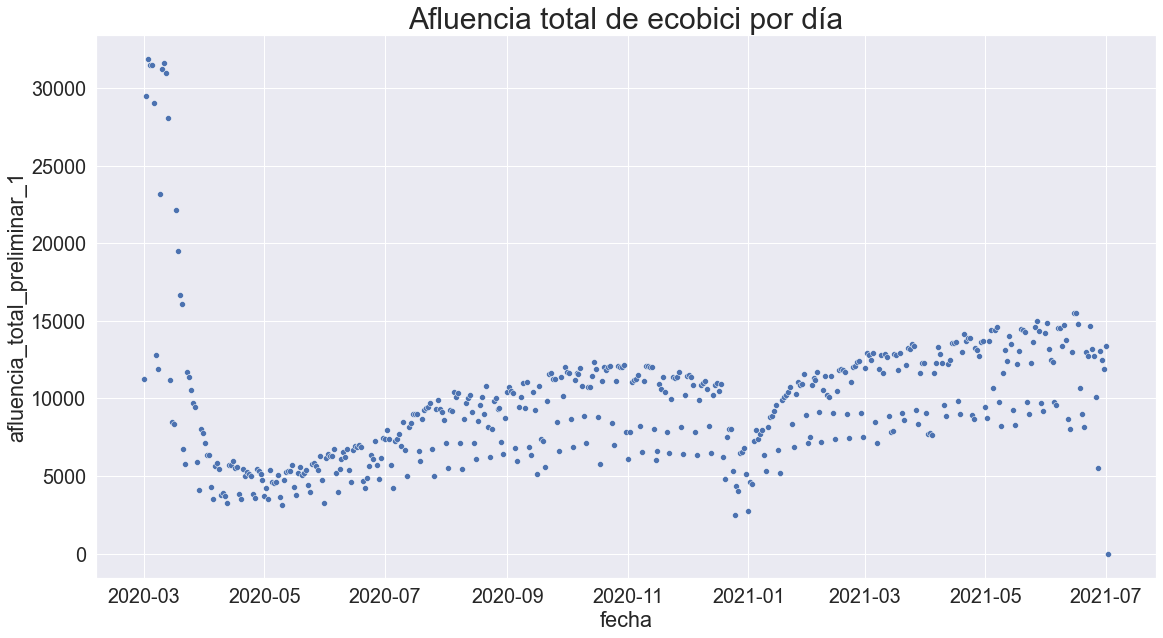

In [23]:
sns.set(font_scale = 1.8)
fig, ax = plt.subplots(figsize=(19, 10))
sns.scatterplot(data=afluencia_ecobici, x="fecha", y="afluencia_total_preliminar_1")
plt.title("Afluencia total de ecobici por día", size=30)
#plt.savefig('Afluencia_ecobici.png',dpi=300)

In [24]:
afluencia_ecobici.head(1)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,"11,238",11238


In [25]:
afluencia_ecobici.tail(1)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
488,489,Ecobici,NaN,Viernes,2021-07-02,NaN,NaN,"0,",0


Observando el head y tail del data set podemos observar que los datos abarcan desde la fecha Domingo 2020-03-01 al Viernes	2021-07-02

En cuanto a la base de datos "Covid-19 SINAVE Ciudad de México", Base del Sistema Nacional de Vigilancia Epidemiologica para el seguimiento a posibles casos de COVID-19 en la Ciudad de México, los datos se actualizan diariamente por lo que se podrán comparar ambas bases de datos sin ningun problema. Esta base de datos puede descargarse de https://datos.cdmx.gob.mx/dataset/base-covid-sinave

En la gráfica anterior sería interesante observar si el aumento en la afluencia total que se puede ver a partir más o menos del id 50 esta relacionado con la fecha en que comenzó la jornada nacional de vacunación contra covid. Esto es fácil de hacer pues la fecha en que inició dicha jornada fue el  12 de enero de 2021. Para dibujar esa línea divisoria bastará con identificar el id correspondiente a esa fecha, eso lo logramos con el siguiente comando:

In [26]:
in_2021_01_12 = afluencia_ecobici['fecha'] == "2021-01-12"


In [27]:
afluencia_ecobici[in_2021_01_12]

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
317,318,Ecobici,NaN,Martes,2021-01-12,NaN,NaN,"8,805",8805


Se dibuja la misma gráfica de dispersión pero ahora con la línea vertical que demarca el inicio de la jornada de vacunación, poniendo de maniefisto al menos que el segundo incremento en la afluencia evidente en el gráfico, está relacionado al menos en principio con el inicio de las jornadas de vacunación. Ahora, es interesante observar que 

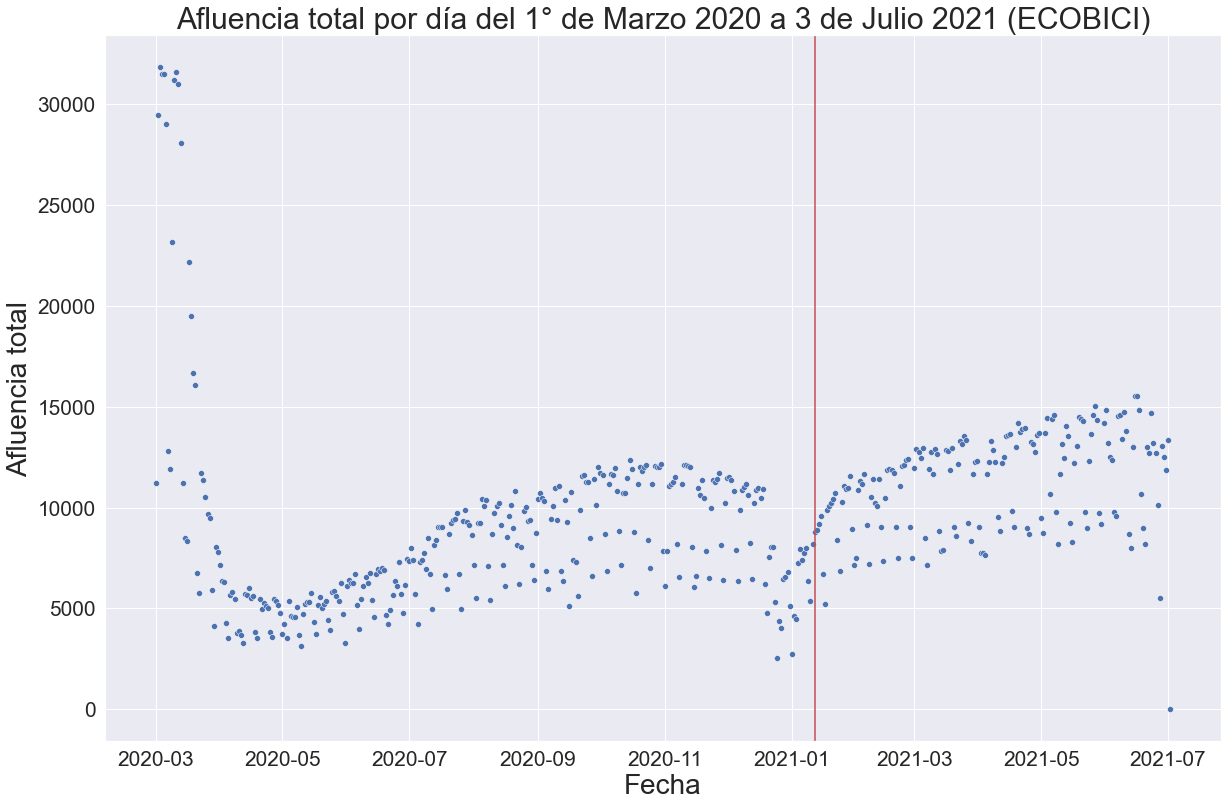

In [28]:
sns.set(font_scale = 1.9)
fig, ax = plt.subplots(figsize=(20, 13))

sns.scatterplot(data=afluencia_ecobici, x="fecha", y="afluencia_total_preliminar_1")
plt.title("Afluencia total por día del 1° de Marzo 2020 a 3 de Julio 2021 (ECOBICI)", size=30)
plt.ylabel("Afluencia total", size=28)
plt.xlabel("Fecha", size=28)
plt.axvline(dt.datetime(2021,1, 12),color='r')
#plt.axvline(13180, 0,100,c="r", linewidth="0.8")
plt.savefig('Afluencia_ecobici_2.png',dpi=300)

# Filtro por tipo de organismo (STC)

In [29]:
in_STC = df['organismo'] == "STC" # Tomaremos datos que solo perteneces al campo del organismo STC-Metro

In [30]:
afluencia_STC = df[in_STC]

In [31]:
afluencia_STC.shape

(5868, 8)

In [32]:
afluencia_STC.tail(3)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
13486,13487,STC,LA,Viernes,2021-07-02,NaN,NaN,NaN
13487,13488,STC,LB,Viernes,2021-07-02,NaN,NaN,NaN
13488,13489,STC,L12,Viernes,2021-07-02,NaN,NaN,NaN


Observe que en el data set original hay filas con valor NaN en la columna "afluencia_total_preliminar" por lo que será necesario darles un formato adecuado para que puedan ser procesados, lo que haremos será sustituirlos por el número 0 seguido de una coma i.e "0,". La coma tendrá utilidad después:


In [33]:
afluencia_STC['afluencia_total_preliminar'] = afluencia_STC['afluencia_total_preliminar'].fillna("0,")

<ipython-input-33-42fb0e348405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afluencia_STC['afluencia_total_preliminar'] = afluencia_STC['afluencia_total_preliminar'].fillna("0,")


In [34]:
afluencia_STC.tail(3)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
13486,13487,STC,LA,Viernes,2021-07-02,NaN,NaN,"0,"
13487,13488,STC,LB,Viernes,2021-07-02,NaN,NaN,"0,"
13488,13489,STC,L12,Viernes,2021-07-02,NaN,NaN,"0,"


Ahora los últimos 3 valores del data set "afluencia_STC" tienen "0," en lugar de "NaN" como queríamos.

Note en el siguiente "head" que los números en la columna "afluencia_total_preliminar" están separados por comas, esto es un inconveniente en la forma en que transformamos los antes caracteres a números, pero para arreglar ese problema es muy sencillo. Basta con sustituir el caracter de coma "," por un caracter vacío " ". Esto se hace para evitar de errores al momento de hacer gráficas y modelos predictivos.

In [35]:
afluencia_STC.head(3)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
7621,7622,STC,L1,Domingo,2020-03-01,NaN,NaN,"418,638"
7622,7623,STC,L2,Domingo,2020-03-01,NaN,NaN,"434,391"
7623,7624,STC,L3,Domingo,2020-03-01,NaN,NaN,"331,274"


Hacemos el reemplazo de caracteres antes mencionado con :

In [36]:
af_4=[]
for index, row in afluencia_STC.iterrows():
    row4=row['afluencia_total_preliminar'].replace(',', '')
    af_4.append(row4)

In [37]:
afl_STC_int = [int(item) for item in af_4]

In [38]:
afluencia_STC= afluencia_STC.assign(afluencia_total_preliminar_1=afl_STC_int)

In [39]:
afluencia_STC["fecha"]=pd.to_datetime(afluencia_STC["fecha"])

Quitar ceros para que no salgan en la gráfica con:

In [40]:
afluencia_STC_sin_ceros = afluencia_STC[afluencia_STC.afluencia_total_preliminar_1 != 0] 
# Podemos eliminar los ceros porque son muy pocos en comparación con todo el conjunto de datos 

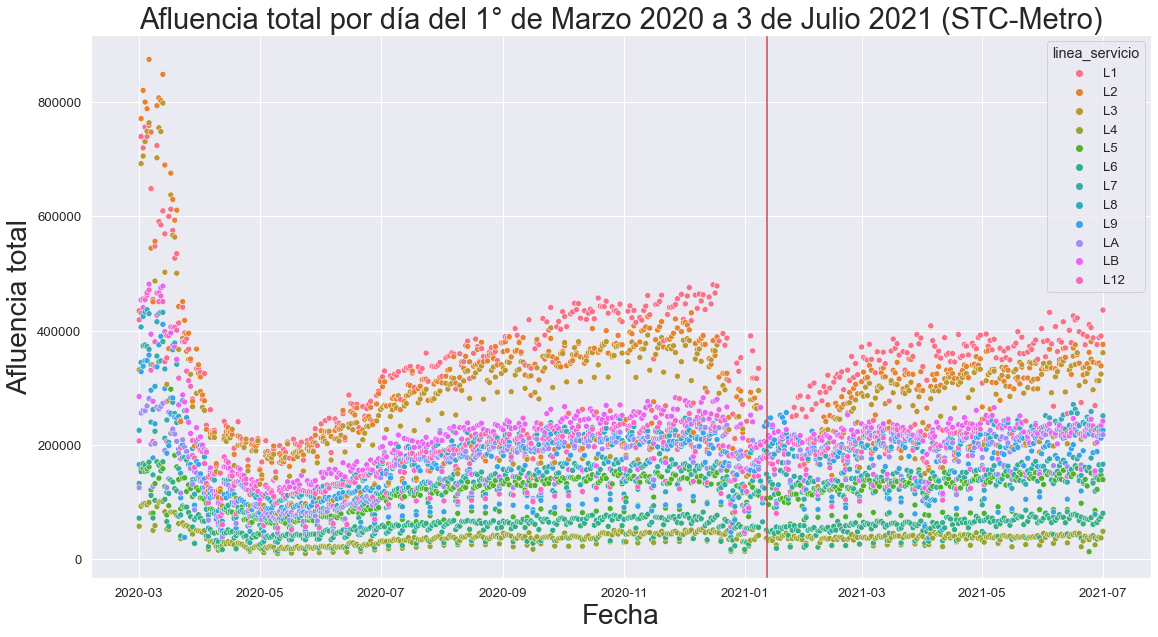

In [41]:
sns.set(font_scale = 1.2)
fig, ax = plt.subplots(figsize=(19, 10))
sns.scatterplot(data=afluencia_STC_sin_ceros , x="fecha", y="afluencia_total_preliminar_1",hue= afluencia_STC.linea_servicio)
plt.axvline(dt.datetime(2021,1, 12),color='r')

plt.title("Afluencia total por día del 1° de Marzo 2020 a 3 de Julio 2021 (STC-Metro)", size=29)
plt.ylabel("Afluencia total", size=28)
plt.xlabel("Fecha", size=28)

plt.savefig('Afluencia_STC',dpi=300)

In [42]:
afluencia_STC_sin_ceros.shape

(5719, 9)

Dado que son los datos relacionados con el "STC" los que más registros tienen según el primer histograma mostrado en este notebook, sería interesante desglosar el anterior gráfico para cada una de las líneas del metro.

### Filtro para la Linea 1 del metro

In [43]:
in_linea_1 = df['linea_servicio'] == "L1"

In [44]:
afluencia_STC_linea_1 = afluencia_STC_sin_ceros[in_linea_1]

<ipython-input-44-d7f736cea25d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afluencia_STC_linea_1 = afluencia_STC_sin_ceros[in_linea_1]


In [45]:
afluencia_STC_linea_1.columns

Index(['id', 'organismo', 'linea_servicio', 'dia', 'fecha', 'afluencia_tarjeta', 'afluencia_boleto', 'afluencia_total_preliminar', 'afluencia_total_preliminar_1'], dtype='object')

In [46]:
afluencia_STC_linea_1.shape

(472, 9)

In [47]:
afluencia_STC_linea_1.head(3)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
7621,7622,STC,L1,Domingo,2020-03-01,NaN,NaN,"418,638",418638
7633,7634,STC,L1,Lunes,2020-03-02,NaN,NaN,"739,516",739516
7645,7646,STC,L1,Martes,2020-03-03,NaN,NaN,"719,480",719480


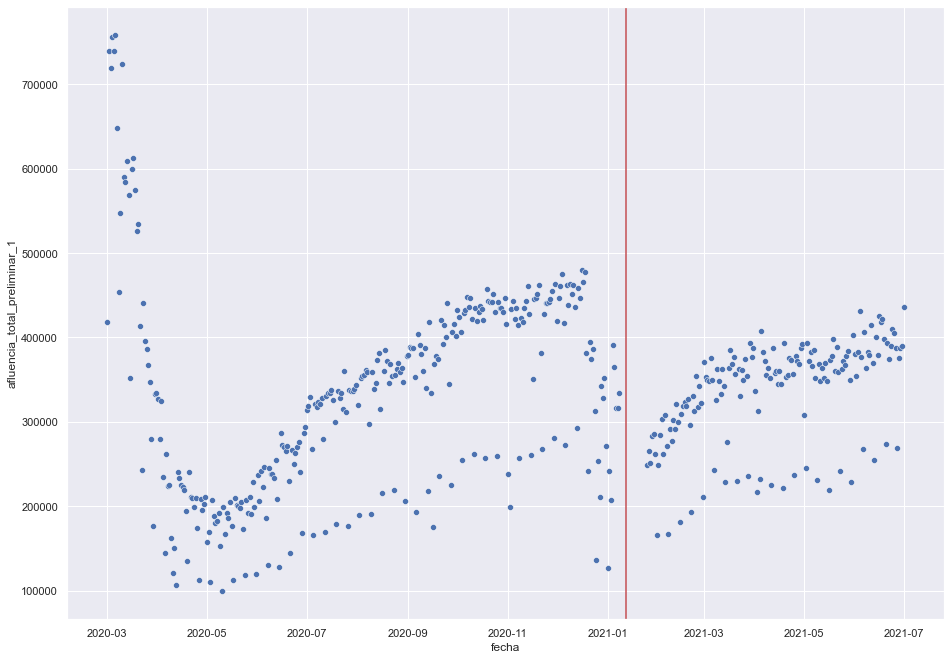

In [48]:
sns.set(rc={'figure.figsize':(15.7,11.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_linea_1, x="fecha", y="afluencia_total_preliminar_1")
plt.axvline(dt.datetime(2021,1, 12),color='r')

### Modelo predictivo para la línea 1

### Función para dibujar el scatter plot de los datos de interés con su respectiva gráfica del mdoelo predictivo

In [ ]:
sns.set(font_scale = 1.2)
fig, ax = plt.subplots(figsize=(19, 10))
sns.scatterplot(data=afluencia_STC_sin_ceros , x="fecha", y="afluencia_total_preliminar_1",hue= afluencia_STC.linea_servicio)
plt.axvline(dt.datetime(2021,1, 12),color='r')

plt.title("Afluencia total por día del 1° de Marzo 2020 a 3 de Julio 2021 (STC-Metro)", size=29)
plt.ylabel("Afluencia total", size=28)
plt.xlabel("Fecha", size=28)

plt.savefig('Afluencia_STC',dpi=300)

In [49]:
# Parámetros de la función
# grado
#var_pred ---> valores de variable predictora
#var_resp ---> valores variable de respuesta

def dibujar_modelo_regresion_polinomial(grado,var_pred,var_resp):
    
    from sklearn.preprocessing import PolynomialFeatures
    lr=LinearRegression()

    poly=PolynomialFeatures(degree=grado)
    
    x_r=var_pred.values.reshape(-1,1)
    x_poly=poly.fit_transform(x_r)
    
    poly.fit(x_poly,var_resp)# creación del modelo
    
    model=lr.fit(x_poly,var_resp)
    y_pred=lr.predict(x_poly)
    
    a=plt.scatter(x_r,var_resp,color='b')
    
   
    
    b=plt.plot(var_pred,y_pred,color='r')
    
    # Print the Intercept:
    print('Ordenada al origen:', model.intercept_)

    # Print the Slope:
    print('Coeficientes del polinomio:', model.coef_) 
    
    r_sq = model.score(x_poly, var_resp)
    print('Valor de r^2:', r_sq)
    #y_pred = model.predict(x_poly)
    #print('Predicted response:', y_pred, sep='\n')
    
    return a,b

### Función para dividir data set en conjunto de entrenamiento(80 % del data set) y de prueba(20 % del data set).

In [50]:
def dividir_datos(data_set,var_predictora, var_respuesta):
    
    from sklearn.model_selection import train_test_split
    
    training_data, testing_data = train_test_split(data_set, test_size=0.2, random_state=25)
    
    X_train=training_data[var_predictora].values.reshape(-1,1)
    Y_train=training_data[var_respuesta]
    
    X_test= testing_data[var_predictora].values.reshape(-1,1)
    Y_test=testing_data[var_respuesta]
    
    return X_train,Y_train,X_test,Y_test

La siguiente función crea un modelo para dos conjuntos; de entrenamiento y de prueba. El tamaño de ambos conjuntos se determina por el parámetro **tamaño_conjunto_prueba** este debe asumir un valor de **0 < tamaño_conjunto_prueba < 1** claro que por la experiencia se sabe que el conjunto de entrenamiento debe ser de alrededor del **70 por ciento**. Para nuestro primer caso de la linea 1 del metro, se determinará un tamaño del conjunto de entrenamiento del 80 por ciento y por lo tanto de un 20 por ciento para el conjunto de prueba.

In [51]:


def crear_modelo_regresion_lineal_polinomica(data_set,var_predictora, var_respuesta, grado,tamaño_conjunto_prueba):
    
    #"Crea un modelo de regresión lineal para un grado de libertad dado"

    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    
    training_data, testing_data = train_test_split(data_set, test_size=tamaño_conjunto_prueba, random_state=25)
    
    X_train=training_data[var_predictora].values.reshape(-1,1)
    Y_train=training_data[var_respuesta]
    
    X_test= testing_data[var_predictora].values.reshape(-1,1)
    Y_test=testing_data[var_respuesta]  
    
    
    pf= PolynomialFeatures(degree=grado)
  
    # transforma las características existentes en características de mayor grado. .
    X_train_poly = pf.fit_transform(X_train)
  
   #ajustar las características transformadas a la regresión lineal 
    lr= LinearRegression()
    lr.fit(X_train_poly, Y_train)
  
  # prediciendo sobre el conjunto de datos de entrenamiento 
    y_train_predicted = lr.predict(X_train_poly)
  
  # prediciendo sobre el conjunto de datos de prueba 
    y_test_predict = lr.predict(pf.fit_transform(X_test))
  
  # evaluar el modelo en el conjunto de datos de entrenamiento 
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluar el modelo en el conjunto de datos de prueba
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
  
  #gráficas de los valores del data set comparados con la predicción del modelo
    
  #plt.scatter(X_train,Y_train,color='r',label="Conjunto de entrenamiento")
  #plt.scatter(X_test,Y_test,color='b',label="Conjunto de prueba")
  #plt.scatter(X_test,y_test_predict,color='m',label="Modelo predictivo")
  #plt.scatter(X_train,y_train_predicted,color='m') 
  #plt.legend(loc='upper right');
  #plt.show()

    print("Modelo desarrollado para el conjunto de entrenamiento")
    print("__________________________________________________________________________")
    print("El error cuadrático medio del conjunto de entrenamiento es {}".format(rmse_train))
    print("El coeficiente R2 del cojunto de entrenamiento es {}".format(r2_train))
  
    print("\n")
  
    print("Modelo desarrollado para el conjunto de prueba")
    print("__________________________________________________________________________")
    print("El error cuadrático medio del conjunto de prueba es {}".format(rmse_test))
    print("El coeficiente R2 del conjunto de prueba es {}".format(r2_test))

    print("Los coeficientes del polinomio son {}".format(lr.coef_))
    print("La ordenada al origen de la fución del modelo es {}".format(lr.intercept_))
    
    #print(X_train.shape,Y_train.shape)
    #print(X_train.shape,y_train_predicted.shape)
  
     #print(y_train_predicted)

In [52]:
crear_modelo_regresion_lineal_polinomica(afluencia_STC_linea_1,"id", "afluencia_total_preliminar_1", 6,0.25)
    

Modelo desarrollado para el conjunto de entrenamiento
__________________________________________________________________________
El error cuadrático medio del conjunto de entrenamiento es 90429.89512707738
El coeficiente R2 del cojunto de entrenamiento es 0.34048956272843034


Modelo desarrollado para el conjunto de prueba
__________________________________________________________________________
El error cuadrático medio del conjunto de prueba es 74601.10102169735
El coeficiente R2 del conjunto de prueba es 0.3430521576097332
Los coeficientes del polinomio son [ 0.00000000e+00 -6.31837350e-07 -4.20561307e-08 -1.63660629e-04
  3.46592237e-08 -2.58120211e-12  6.60700439e-17]
La ordenada al origen de la fución del modelo es 9451448.311504055


In [ ]:
sns.set(font_scale = 1.2)
fig, ax = plt.subplots(figsize=(19, 10))
sns.scatterplot(data=afluencia_STC_sin_ceros , x="fecha", y="afluencia_total_preliminar_1",hue= afluencia_STC.linea_servicio)
plt.axvline(dt.datetime(2021,1, 12),color='r')

plt.title("Afluencia total por día del 1° de Marzo 2020 a 3 de Julio 2021 (STC-Metro)", size=29)
plt.ylabel("Afluencia total", size=28)
plt.xlabel("Fecha", size=28)

plt.savefig('Afluencia_STC',dpi=300)

Ordenada al origen: 9180343.185492685
Coeficientes del polinomio: [ 0.00000000e+00  6.36899585e-07 -4.09429489e-08 -1.59457672e-04
  3.38020142e-08 -2.51944044e-12  6.45348769e-17]
Valor de r^2: 0.34314768179032484


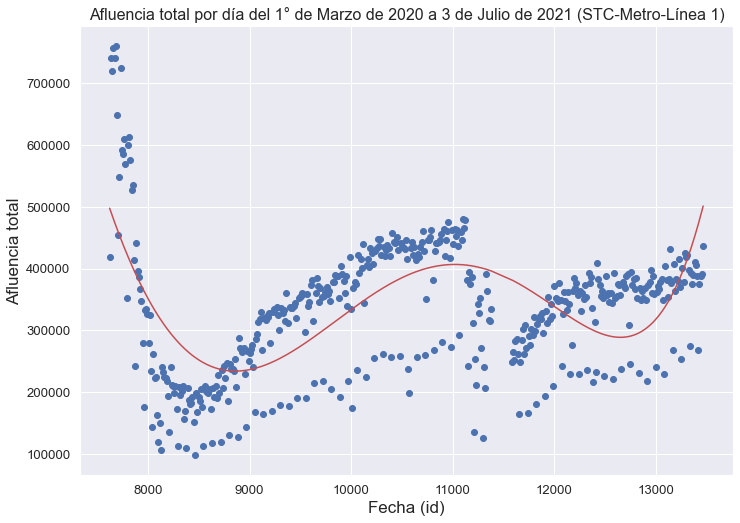

In [128]:
sns.set(font_scale = 1.2)
dibujar_modelo_regresion_polinomial(6,afluencia_STC_linea_1["id"],afluencia_STC_linea_1["afluencia_total_preliminar_1"])
plt.title("Afluencia total por día del 1° de Marzo de 2020 a 3 de Julio de 2021 (STC-Metro-Línea 1)", size=16)
plt.ylabel("Afluencia total", size=17) 
plt.xlabel("Fecha (id)", size=17)

plt.savefig('Afluencia_STC_Linea_1',dpi=300)
    

# Modelo predictivo a partir de iniciada la jornada nacional de vacunación

In [87]:
fecha_inicial = '2021-01-12'
fecha_final = '2021-07-01'

In [88]:
ene_01_a_jul_01 = (afluencia_STC_linea_1["fecha"] > fecha_inicial) & (afluencia_STC_linea_1["fecha"] <= fecha_final)

In [89]:
afluencia_STC_ene_jul_linea_1 = afluencia_STC_linea_1.loc[ene_01_a_jul_01]
afluencia_STC_ene_jul_linea_1.shape

(158, 9)

<AxesSubplot:xlabel='fecha', ylabel='afluencia_total_preliminar_1'>

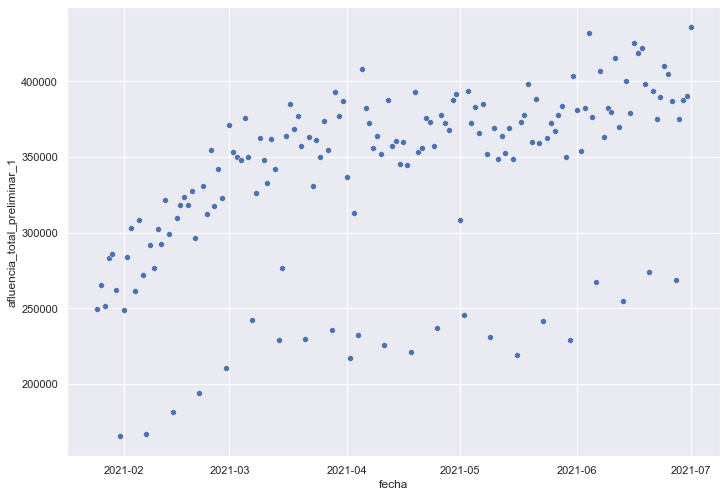

In [92]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_ene_jul_linea_1, x="fecha", y="afluencia_total_preliminar_1")


#### Filtro afluencia mayor  a 30 000

In [84]:
casos_CDMX_ene_jul.head(1)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar,afluencia_total_preliminar_1
11581,11582,STC,L1,Lunes,2021-01-25,NaN,NaN,"249,365",249365


El filtro con valores de afluencia mayores a 300000, nos dará un conunto de puntos sobre el cual se podrá hacer un modelo predictivo de mayor confianza

In [93]:
afluencia_STC_ene_jul_linea_1_300000=casos_CDMX_ene_jul[casos_CDMX_ene_jul.afluencia_total_preliminar_1>300000]

<AxesSubplot:xlabel='fecha', ylabel='afluencia_total_preliminar_1'>

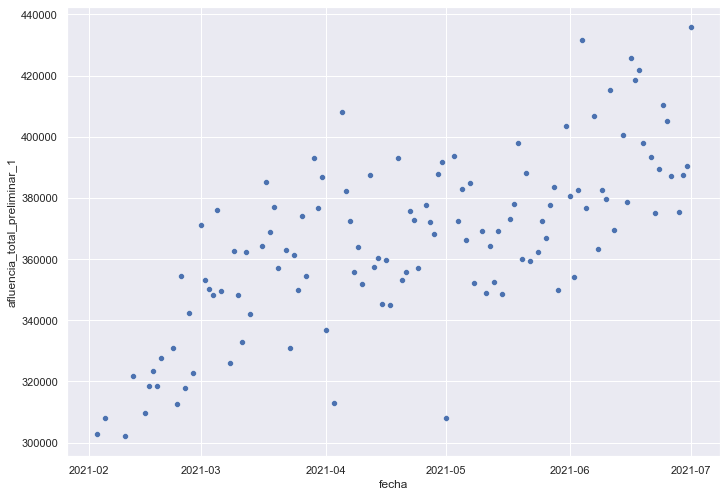

In [94]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #tamaño del gráfico
sns.scatterplot(data=afluencia_STC_ene_jul_linea_1_300000, x="fecha", y="afluencia_total_preliminar_1")

Hacemos nuevamente un modelo predictivo para este conjunto de datos

In [107]:
crear_modelo_regresion_lineal_polinomica(afluencia_STC_ene_jul_linea_1_300000,"id", "afluencia_total_preliminar_1", 6,0.25)
    

Modelo desarrollado para el conjunto de entrenamiento
__________________________________________________________________________
El error cuadrático medio del conjunto de entrenamiento es 19311.8579945581
El coeficiente R2 del cojunto de entrenamiento es 0.5605327751128126


Modelo desarrollado para el conjunto de prueba
__________________________________________________________________________
El error cuadrático medio del conjunto de prueba es 15775.284672931008
El coeficiente R2 del conjunto de prueba es 0.6001658034769091
Los coeficientes del polinomio son [ 0.00000000e+00  1.07424869e-15  8.41370706e-17  7.95776860e-13
  4.46317425e-09 -5.61589715e-13  1.84048728e-17]
La ordenada al origen de la fución del modelo es -7421059.331101744


Ordenada al origen: -6823760.568254356
Coeficientes del polinomio: [ 0.00000000e+00  2.82166521e-14  7.79669005e-17  7.36077908e-13
  4.12130794e-09 -5.18748285e-13  1.70084975e-17]
Valor de r^2: 0.5699902225524698


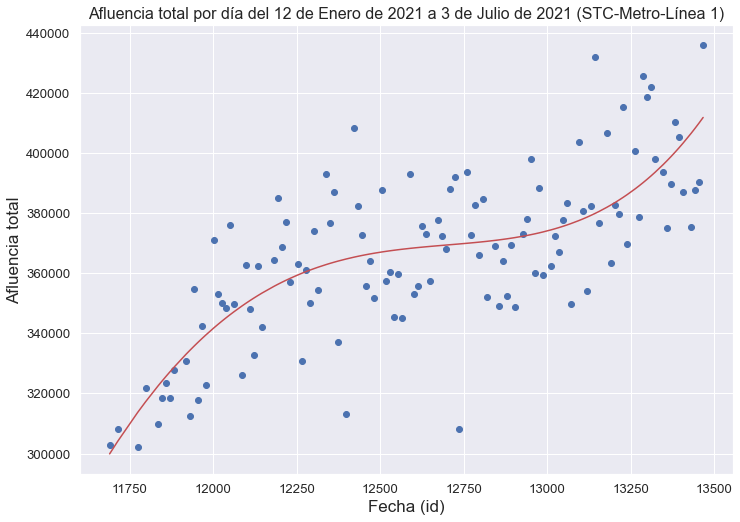

In [129]:
sns.set(font_scale = 1.2)
dibujar_modelo_regresion_polinomial(6,afluencia_STC_ene_jul_linea_1_300000["id"],afluencia_STC_ene_jul_linea_1_300000["afluencia_total_preliminar_1"])
plt.title("Afluencia total por día del 12 de Enero de 2021 a 3 de Julio de 2021 (STC-Metro-Línea 1)", size=16)
plt.ylabel("Afluencia total", size=17) 
plt.xlabel("Fecha (id)", size=17)

plt.savefig('Afluencia_STC_Linea_1_1',dpi=300)